# Linear stability analysis of car-following models

This notebook is intended to help you to simulate car-following models and analyse their stability in python.

This tutorial will assume that you have the **anaconda distribution** (freely available here: https://www.continuum.io/downloads) of python installed, which includes instructions on how to download and install anaconda.

This is a **Jupyter** (or ipython) notebook. It consists of cells, such as this, in which you can write text or computer code. This cell is written in **Markdown**, which allows you to format your text and use simple latex commands. (For some basic Markdown commands read: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

To edit the text in a cell, double click on it. Once you're finished editing and want to run the code, press `shift+enter`

There is good **documentation** for python at https://www.python.org, but I find it easiest to google the things I'm looking for (e.g. function syntax, which means the arguments that a function takes).

## Disclaimer
This work sheet is intended as a guide for developing a program that simulates the Optimal Velocity (OV) model, by solving the corresponding system of ODEs, and analyse its stability. The way that it suggests is not the only way to implement the model. If you find another method is more intuitive or runs quicker then feel free to use it! It is also possible to generate a general framework to run the general class of car-following models, but let's walk before we can run.

This worksheet should contain all the information you need in order to create a working version of the OV model, although the precise way in which you implement it may differ to what I think you'll end up with, so it's not completely guaranteed everything you need is here. In which case Google it!.

## How to use this worksheet
This worksheet will introduce you to the basics of python and provide you with relevant examples.


<section style="color:#806000; background-color:#ffffdd">
<br>
<b>OV Model</b>
<br><br>
This worksheet also includes highlighted text like this that connects the examples to your OV model program.  
<br>
</section>

## Tip
It's normally helpful to have two notebooks open when coding, one where you test out commands/scraps of code, and the other where you write your program. I would encourage you to open **two** new notebooks, one to test out the examples in this worksheet and one for your code.
## Tip
If you write a piece of code and then later decide to change it, create a new cell, copy and paste your old code into the new cell (you can do this using the copy and paste icons above or you can create new cells using the insert tab above) and then edit that. If you delete things that you then later want, it can be a pain to get them back.
## Tip
You can block comment bits of code by highlighting them and the pressing `ctrl+/` (i.e. contral and forward slash).

# 1 Basics

You can use cells as calculators, for example

In [2]:
1+2

3

but often we will want to store numbers as **variables**, which we do like so 

In [3]:
x=1

We can then use these variables in calculations, e.g.

In [4]:
x+2 # This is a comment and won't show up in the output. 
# Use comments to explain what your code is doing

3

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>OV Model - Parameters</b>
<br><br>
We will need to specify the number of cars $N$ (an integer) and the value of the sensitivity parameter $\alpha$. You shoud be able to define this variable now (but make sure you choose a positive value for it!).
<br><br>
</section>

## 1.1 Arrays
###1.1.1 Creating arrays

There is a python package called **NumPy** (http://www.numpy.org) that was written to make scientific programming easier and has lots of built in functions to do sophisticated things with matrices. If you installed the Anaconda distribution of python then you will have it already. We will use the NumPy package in this worksheet and to do so you need to type

In [5]:
import numpy as np

Every time we want to use one of the functions in the NumPy package, we have to write `np.` and then the name of the function.

We will make use of NumPy **arrays**, which allow us to store vectors and matrices and manipulate them in various ways. To creat a numpy array, you can define each element, for example like this

In [6]:
v=np.array([10,2,300])
v

array([ 10,   2, 300])

There are also built in ways to generate arrays, for example

In [7]:
w=np.zeros((3,1))
x=np.ones((2,2))
y=np.linspace(0,2,3)
z=np.random.rand(3,4)
# If we want to see what's in both x and y, we can use the print command:
print('Variable w is ')
print(w)
print("Variable x is ")
print(x)
print("Variable y is ")
print(y)
print("Variable z is ")
print(z)

Variable w is 
[[ 0.]
 [ 0.]
 [ 0.]]
Variable x is 
[[ 1.  1.]
 [ 1.  1.]]
Variable y is 
[ 0.  1.  2.]
Variable z is 
[[ 0.60309429  0.94942446  0.50343795  0.3062138 ]
 [ 0.16390381  0.38097269  0.02298972  0.69984767]
 [ 0.42756815  0.88619014  0.42924925  0.72082013]]


We may want to check how big an array is

In [9]:
print(w.shape)
print(x.shape)
print(y.shape)
print(z.shape)

(3, 1)
(2, 2)
(3,)
(3, 4)


Notice the difference in shape between these variables.

We can also append one array onto the end of the other

In [10]:
np.append(y,y)

array([ 0.,  1.,  2.,  0.,  1.,  2.])

You can also do this using NumPy's `hstack` function, which stacks arrays horizontally

In [11]:
np.hstack((y,y))

array([ 0.,  1.,  2.,  0.,  1.,  2.])

And a similar function `vstack` allows you to stack arrays vertically

In [12]:
np.vstack((y,y))

array([[ 0.,  1.,  2.],
       [ 0.,  1.,  2.]])

You should play around with these functions, combining arrays of different sizes and dimensions to see what happens and what the differences are.

You can also perform basic operations on these arrays, which work **elementwise**

In [13]:
y+2

array([ 2.,  3.,  4.])

In [14]:
y**2

array([ 0.,  1.,  4.])

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>OV Model - headway, velocity and position arrays</b>
<br><br>
Create the following:
<ul>
<li> an array of headways $h$ of length $N$, all with value 2,  (i.e. a headway value for each of your vehicles),
<li> an array of velocities $v$ of length $N$, all with value 0.
</ul>
<br>
These arrays will represent the initial headways and velocities of the vehicles in our simulation. 
<br><br>
In this notebook, I will assume that vehicles are labelled $n=0,1,\dots,N-1$, vehicle $n=0$ is the lead vehicle and that vehicles' positions increase in time. Thus $x_{n-1}>x_n$ for $0<n\le N-1$ and all $t$.
<br><br>
With this in mind, suppose that the lead vehicle is at position $x_0=0$ at time $t=0$, how can we get an array of length $N$ of all vehicle positions $x$ from the headways? (Negative initial positions are fine.) A useful function to achieve this is NumPy's `cumsum` function, which computes the cumulative sum of an array. Look at what it does to the array `y`:
<br><br>
</section>

In [11]:
print(y)
print(np.cumsum(y))

[ 0.  1.  2.]
[ 0.  1.  3.]


<section style="color:#806000; background-color:#ffffdd">
<br>
Combine your vectors $x$, $h$ and $v$ into a single array of length $3N$.
<br><br>
</section>

### 1.1.2 Slicing arrays

You can access elements of arrays in various ways and what you get will depend on the size of the array. For example

In [12]:
print(y)
print(y[0])
print(y[1])
print(y[2])

[ 0.  1.  2.]
0.0
1.0
2.0


Notice that the indices for python arrays start at zero. We can also use negative indicies (!)

In [13]:
print(y[-1])
print(y[-2])

2.0
1.0


So an easy way to access the last value in an array is to look at the element `[-1]`.

You can access elements of a multi-dimensional array in the same way, but look at what you get when you do

In [14]:
z[0]

array([ 0.61662392,  0.80900097,  0.30968582,  0.32621673])

If we just wanted the value of a single element, we would have to do

In [15]:
z[0,0]

0.61662391596005894

(Python can also handle arrays with more dimensions, but we won't get into that here.)

We might also want to access several elements, which we can do using slicing. Remember that

In [16]:
z

array([[ 0.61662392,  0.80900097,  0.30968582,  0.32621673],
       [ 0.71975169,  0.00192496,  0.48830202,  0.60293996],
       [ 0.26524947,  0.22584747,  0.83374808,  0.24448162]])

So to get the first 2 elements in the first column, we would write

In [17]:
z[0:2,0]

array([ 0.61662392,  0.71975169])

(Notice that you have to write `0:2` to get just elements 0 and 1.)

Similarly, to get the first 2 elements in the first row, we would write

In [18]:
z[0,0:2]

array([ 0.61662392,  0.80900097])

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>OV Model - boundary conditions</b>
<br><br>
When we solve the OV model ODEs, it will be convienient to use the array that combines position $x$, velocity $v$ and headway $h$, as you defined earlier. Use slicing to retrieve the position, velocity and headway from this array (this may seem pointless now, but it will be useful later!).
<br><br>
We will also have to decide on the boundary conditions. Two usual choices are a **ring-road**, where vehicle $n=0$ follows vehicle $n=N-1$ (assuming the ordering of vehicles defined above), and a **long-straight road**, where the velocity of the lead vehicle, $n=0$ is known at all times (e.g. it's a constant).
<br><br>
How could you create an array of the velocity differences $v_{n-1}-v_n$ for each of these boundary conditions? For the ringroad, a useful function is NumPy's `roll` which does the following
<br><br>
</section>

In [16]:
# For this example, I create a dummy vector to illustrate how roll works:
dummy=np.linspace(-2,3,6)
print(dummy)
print(np.roll(dummy,+1))
print(np.roll(dummy,-1))

[-2. -1.  0.  1.  2.  3.]
[ 3. -2. -1.  0.  1.  2.]
[-1.  0.  1.  2.  3. -2.]


## 1.2 Functions

Sometimes you'll want to combine some commands together into a function. In python, functions can be defined as follows

In [18]:
def myfunction(x,t,alpha):
    ''' myfunction(x,t,alpha)
        
        This function computes alpha+x^2 for an array x and a parameter alpha. 
        The input variable t is not used.

        This text will appear as the function's help file. 
    '''
    # Here the function performs some operations on your input variable array  
    xdot=alpha+x**2
    return xdot       

You can call your function whatever you like. The things in brackets are the function arguments, i.e. the things you have to supply when calling the function.

Notice that the first line ends with a colon and the remaining lines in the function are indented. This function simply squares the input array `x` and adds the value `alpha`, and the resulting array is then returned from the function. You'd call this function in the following way

In [19]:
myfunction(2,'you can pass anything here as it is not used',0.1)

4.1

Notice that it works **element-wise** on arrays using our dummy array from ealier

In [20]:
print(dummy)
print(myfunction(dummy,' ',0.))

[-2. -1.  0.  1.  2.  3.]
[ 4.  1.  0.  1.  4.  9.]


<section style="color:#806000; background-color:#ffffdd">
<br>
<b>OV Model - Optimal velocity function</b>
<br><br>
The specific Optimal Velocity function used in the original paper by Bando et al is
$$V(h)=\tanh(h-2)+\tanh(2)$$
Define a function that computes this for an array of headways `h`. It would also help if you define a function $V'(h)$, i.e. the derivative of $V$ with respect to $h$.
<br><br>
</section>

## 1.3 Plotting

We will quite often want to plot the results we get. There is a good package for doing this called `matplotlib`, which also has lots of documentation online at http://matplotlib.org and examples of lots of different types of plot.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# This last line lets you plot in a cell.

Plotting can be done easily and quickly

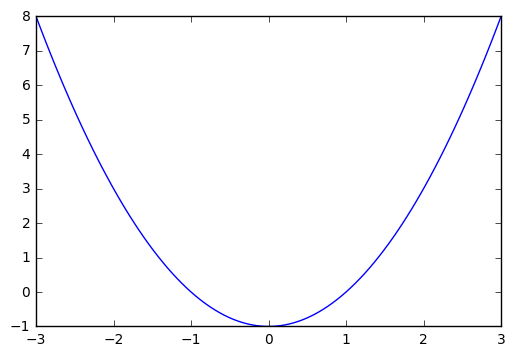

In [22]:
x=np.linspace(-3,3,100)
plt.plot(x,myfunction(x,'',-1))

But you can also include multiple plots and control just about everything you want to about it.

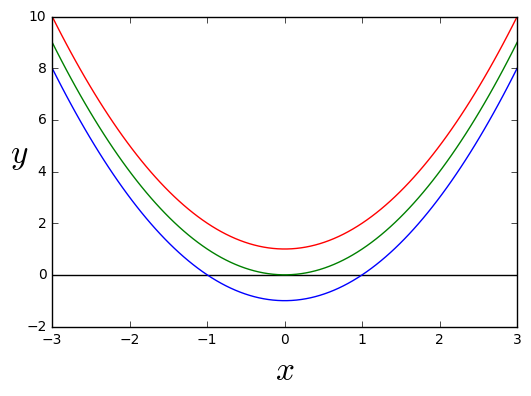

In [23]:
x=np.linspace(-3,3,100)

fig = plt.figure()
plt.plot(x,0*x,'k',x,myfunction(x,'',-1))
plt.plot(x,myfunction(x,'',0))
plt.plot(x,myfunction(x,'',1))
plt.xlabel('$x$',fontsize=24)
plt.ylabel('$y$',fontsize=24,rotation=0)

# We can save the figure
fig.savefig('testplotCF.pdf')
# fig.savefig('test.eps') # This is a different type of format, encapsulated postscript

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>OV Model - Plotting the Optimal Velocity function</b>
<br><br>
Create an array of headways with non-negative values and plot your OV function for these.
<br><br>
A general car-following model can be described by
\begin{align}
\dot{h}_n&=v_{n-1}-v_{n},\\
\dot{v}_n&=f(h_n,\dot{h}_n,v_n),
\end{align}
where $h_n$ and $v_n$ are the headway and velocity respectively of vehicle $n$. This model is unstable if
$$\frac{f_v^2}{2}-f_{\dot{h}}f_h-f_{h}<0,$$
where $f_v$ is the partial derivative of $f$ with respect to $v$, and similarly for $f_{\dot{h}}$ and $f_h$. Note that the partial derivatives are evaluated at the equilibrium $h_n=h_*$, $\dot{h}_n=0$ and $v_n=V(h_*)$ for all $n$ and a given equilibrium headway $h_*$. 

<br><br>
*[You should read through Wilson's paper "Mechanisms for spatio-temporal pattern formation in highway traffic models", Phil. Trans. Roy. Soc. A, 2008, to understand where this criterion comes from.]*

<br><br>
For the OV model we have
$$f(h,\dot{h},v)=\alpha\left\{V(h)-v\right\}.$$
What are the partial derivatives? How does the stability depend on the equilibrium headay $h_*$ and the sensitivity parameter $\alpha$? How could you illustrate this in a plot?
<br><br>
</section>

## 1.4 Solving ODEs

There is another package called SciPy that has lots of really useful functions for scientific programming. This includes built in functions to integrate ODEs numerically (you should try to find out how they do this). From the SciPy package we will use the function `odeint`

In [24]:
from scipy.integrate import odeint

The function `odeint` solves first order systems of inhomogeneous ODEs, i.e. of the form
$$\dot{x}=f(x,t)$$
where $x$ can be an $n$ dimensional array. Note that higher order ODEs can be written as first order ODEs by defining new variables for the higher order derivatives. The function `odeint` takes as arguments the function that describes the right-hand side of the ODEs, the initial condition and an array of times. It returns the numerically integrated solution at the times specified in the input array. [For a full list of input and output arguments, see the scipy documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html]

The following example integrates the function `myfunction` defined above for two initial conditions and plots the output.

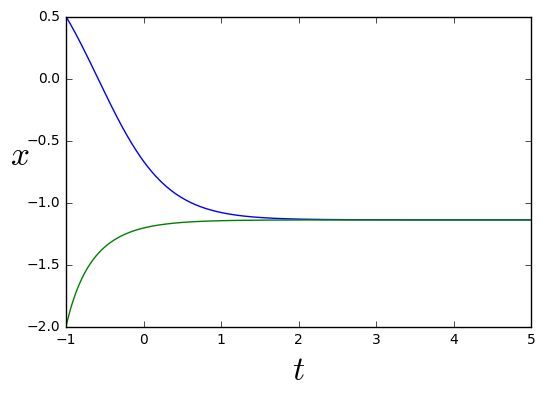

In [25]:
alpha=-1.3 # Function parameter
x0p=0.5 # First starting value
x0m=-2 # Second starting value
t=np.linspace(-1,5,500) # Array of times

# Called odeint
x1 = odeint(myfunction, x0p, t, args=(alpha,))
x2 = odeint(myfunction, x0m, t, args=(alpha,))

# Plot resulting trajectories
plt.plot(t,x1,t,x2)
plt.xlabel('$t$',fontsize=24)
plt.ylabel('$x$',fontsize=24,rotation=0)

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>OV Model - Integrating the Optimal Velocity model</b>
<br><br>
Now let's use the `odeint` function to find the trajectory of a single vehicle following another that's travelling at a constant velocity $v_*$ using the OV model. The ODEs that we want to solve are
\begin{align}
\dot{x}_1&=v_1,\\
\dot{h}_1&=v_*-v_1,\\
\dot{v}_1&=\alpha\left\{V(h_1)-v_1\right\}.
\end{align}
Notice that I've added the $\dot{x}_1$ equation. This is just so that we know what the position of the vehicle is, but note that we don't actually need it to solve for the headway $h_1$ and the velocity $v_1$. 
<br><br>
You will need to write a function of the form
<br><br>
</section>

```python
def OVStraightRoad1Car(y,t,alpha,Vfunc,vstar):
```

<section style="color:#806000; background-color:#ffffdd">
<br>
where 
<ul>
<li> `y` is an array with three elements: the position $x_1$, the headway $h_1$ and the velocity $v_1$,
<li> `t` will not be used (but needs to be there for `odeint`),
<li> `alpha` is the sensitivity parameter,
<li> `Vfunc` is your OV function that you defined earlier (although you will need to change `Vfunc` to whatever name you used),
<li> `vstar` is the velocity of the lead vehicle.
</ul>
<br><br>
This function should return an array with three elements corresponding to the right-hand side of the ODEs (in the same order as the input variable `y`).
<br><br>
You will have to supply `odeint` with an initial condition, say `y0`. To start with, try
<br><br>
</section>

```python
y0=np.array([0,1,0])
```

<section style="color:#806000; background-color:#ffffdd">
<br>
So that the vehicle's initial position is $x_1(0)=0$, initial headway is $h_1(0)=1$ and initial velocity is $v_1(0)=0$.
<br><br>
The output of the `odeint` function for your OV function should be a square array. You can then slice this array to get the evolution of the vehicle's position $x_1(t)$, headway $h_1(t)$ and velocity $v_1(t)$. If this is working properly, the position $x_1(t)$ should increase linearly asyptotically, and the headway and velocities should become constant. Plot them to check that they do this!
<br><br>
You should try different initial conditions and parameter values. Are all solutions qualitatively the same as described above? The fact that the headway and velocity always become constant is known as *platoon* stability. You should find out to show that this is true for all car-following models that satisify the requirements on the partial derivatives $f_h>0$, $f_{\dot{h}}>0$ and $f_v<0$, specified by Wilson in the paper referenced above.
<br><br>
Generalise your model to include multiple vehicles (e.g. using arrays of positions, velocities and headways) for both long-straight-road and ring-road boundary conditions. 
<br><br>
</section>

## 1.5 Complex numbers

You can also work with complex numbers in python:

In [26]:
z=3+4j
print('z = ',z)
print('z^2 = ',z**2)
print('abs(z) = ',np.abs(z))
print('real part of z is ',np.real(z))
print('imaginary part of z is ',np.imag(z))
print('exp(i pi) = ',np.exp(1j*np.pi)) #Note that this isn't exactly zero! But for most purposes it's close enough!

z =  (3+4j)
z^2 =  (-7+24j)
abs(z) =  5.0
real part of z is  3.0
imaginary part of z is  4.0
exp(i pi) =  (-1+1.22464679915e-16j)


<section style="color:#806000; background-color:#ffffdd">
<br>
<b>OV Model - Characteristic equation</b>
The characteristic equation for the general car-following model is
<br><br>
$$\lambda^2+\{f_{\dot{h}}(1-{\rm e}^{-{\rm i}\theta})-f_v\}\lambda+f_h(1-{\rm e}^{-{\rm i}\theta})=0,$$
<br>
(see Wilson's paper, cited above). Use the quadratic formula to solve for $\lambda$ and write a python function that takes the partial derivatives and theta as arguments and computes the plus solution $\lambda_+$ and do the same for the minus solution $\lambda_-$. Choose some values of the partial derivatives (for example, by calculating them for the OV model above) and plot the real part of $\lambda_{\pm}$ for values of theta between 0 and $\pi$. How do you know when the system is unstable? You could use the conditions for the OV model described above. 
<br><br>
</section>

## 1.6 Computing eigenvalues
You can also easily compute eigenvalues of square matrices using NumPy: 



In [27]:
M=1-2*np.random.random((3,3))
M

array([[ 0.41119157, -0.67230936,  0.05295545],
       [ 0.86114321,  0.85307783,  0.20928381],
       [ 0.0554724 , -0.05593511, -0.83580022]])

In [28]:
u,v=np.linalg.eig(M)

In [29]:
u

array([ 0.63226820+0.73437015j,  0.63226820-0.73437015j, -0.83606722+0.j        ])

In [30]:
v

array([[-0.18788814+0.63212313j, -0.18788814-0.63212313j, -0.08510962+0.j        ],
       [ 0.75076122+0.j        ,  0.75076122-0.j        , -0.07966473+0.j        ],
       [-0.01900152+0.0333905j , -0.01900152-0.0333905j ,  0.99318170+0.j        ]])

The array `v` is the matrix of eigenvectors, so the matrix times one of the eigenvectors:

In [31]:
M.dot(v[:,0])

array([-0.58300805+0.26169191j,  0.47468245+0.55133663j,
       -0.03653504+0.0071576j ])

is the same as the eigenvalue times the eigenvector.

In [32]:
u[0]*v[:,0]

array([-0.58300805+0.26169191j,  0.47468245+0.55133663j,
       -0.03653504+0.0071576j ])

You plot the eigenvalues in the complex plane

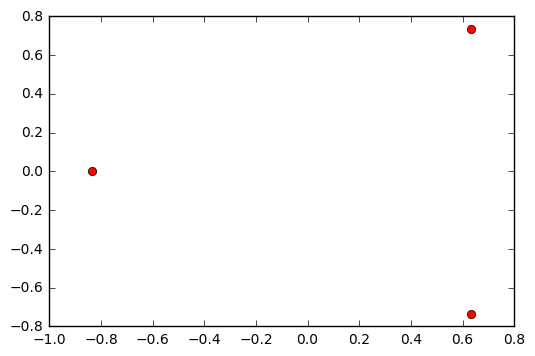

In [33]:
plt.plot(np.real(u),np.imag(u),'ro')

<section style="color:#806000; background-color:#ffffdd">
<br>
<b>OV Model - Eigen spectrum of linearised equations</b>
<br>
The general car-following model can be linearised by substituting $h_n=h_*+\tilde{h}_n(t)$ and $v_n=V(h_*)+\tilde{v}_n(t)$, into the general equations above, Taylor expanding $f$ about the equilibrium where $v_n=v_{n-1}$ and $f(h_*,0,V(h_*)=0$, and neglecting nonlinear terms. For $N$ vehicles, this results in a linear system of equations for the perturbations
\begin{align}
\dot{\tilde{h}}_n&=\tilde{v}_{n-1}-\tilde{v}_{n},\\
\dot{\tilde{v}}_n&=f_h \tilde{h}_n + f_{\dot{h}} (\tilde{v}_{n-1}-\tilde{v}_{n})+f_v\tilde{v}_n.
\end{align}
These equations can be written as a linear system $\dot{y}=My$ for $y\in\mathbb{R}^{2N}$.
What are the components of the matrix $M$? If you do it correctly, the matrix $M$ should split into four $N\times N$ blocks arranged in a square. Using the values of the partial derivatives above, create a NumPy array that corresponds to the matrix $M$. A helpful function for this is NumPy's `diag` function:
<br><br>
</section>

In [34]:
N=5
np.diag(-np.ones(N),0)

array([[-1.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1.]])

In [35]:
np.diag(np.ones(N-1),-1)

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [36]:
np.diag(np.array([1]),N-1)

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

<section style="color:#806000; background-color:#ffffdd">
<br>
Hint: If you add the matrices above together, you'll get one of the blocks in $M$.
<br><br>
You should plot these eigenvalues in the complex plane and compare them to the real and imaginary part of $\lambda_{\pm}$ calculated above.
<br><br>
How you use the above code will depend on what you do as part of your project. Some guidance is included in the project description document.
</section>